In [1]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 53.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

In [4]:
# データの読み込み
df = pd.read_csv('/content/drive/MyDrive/hotel_reviews.csv')
df.head(3)

,性別,年齢,個人/グループ,旅行の目的,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度
0,女性,50,グループ,学生,4,4,4,4,3,4,4,4,4,4
1,女性,35,個人,ビジネス,4,5,4,4,1,1,5,4,1,2
2,女性,22,グループ,その他,1,1,1,4,1,5,1,3,1,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   性別             10000 non-null  object
 1   年齢             10000 non-null  int64 
 2   個人/グループ        10000 non-null  object
 3   旅行の目的          10000 non-null  object
 4   Wifi設備         10000 non-null  int64 
 5   送迎の便利さ         10000 non-null  int64 
 6   オンライン予約のしやすさ   10000 non-null  int64 
 7   ホテルの立地         10000 non-null  int64 
 8   食事の満足度         10000 non-null  int64 
 9   滞在時の快適さ        10000 non-null  int64 
 10  チェックイン・アウトの接客  10000 non-null  int64 
 11  その他のサービス       10000 non-null  int64 
 12  清潔さ            10000 non-null  int64 
 13  満足度            10000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [6]:
df.select_dtypes(include='object').columns

Index(['性別', '個人/グループ', '旅行の目的'], dtype='object')

In [7]:
# 数値化（OneHotEncoding）
_df = pd.get_dummies(df, drop_first=True)
_df.head()

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,満足度,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
0,50,4,4,4,4,3,4,4,4,4,4,0,0,0,1,0,0
1,35,4,5,4,4,1,1,5,4,1,2,0,1,1,0,0,0
2,22,1,1,1,4,1,5,1,3,1,3,0,0,0,0,0,0
3,30,3,4,3,4,5,1,4,4,5,3,1,1,0,0,0,1
4,59,4,3,3,3,4,4,3,5,4,4,1,0,0,0,0,1


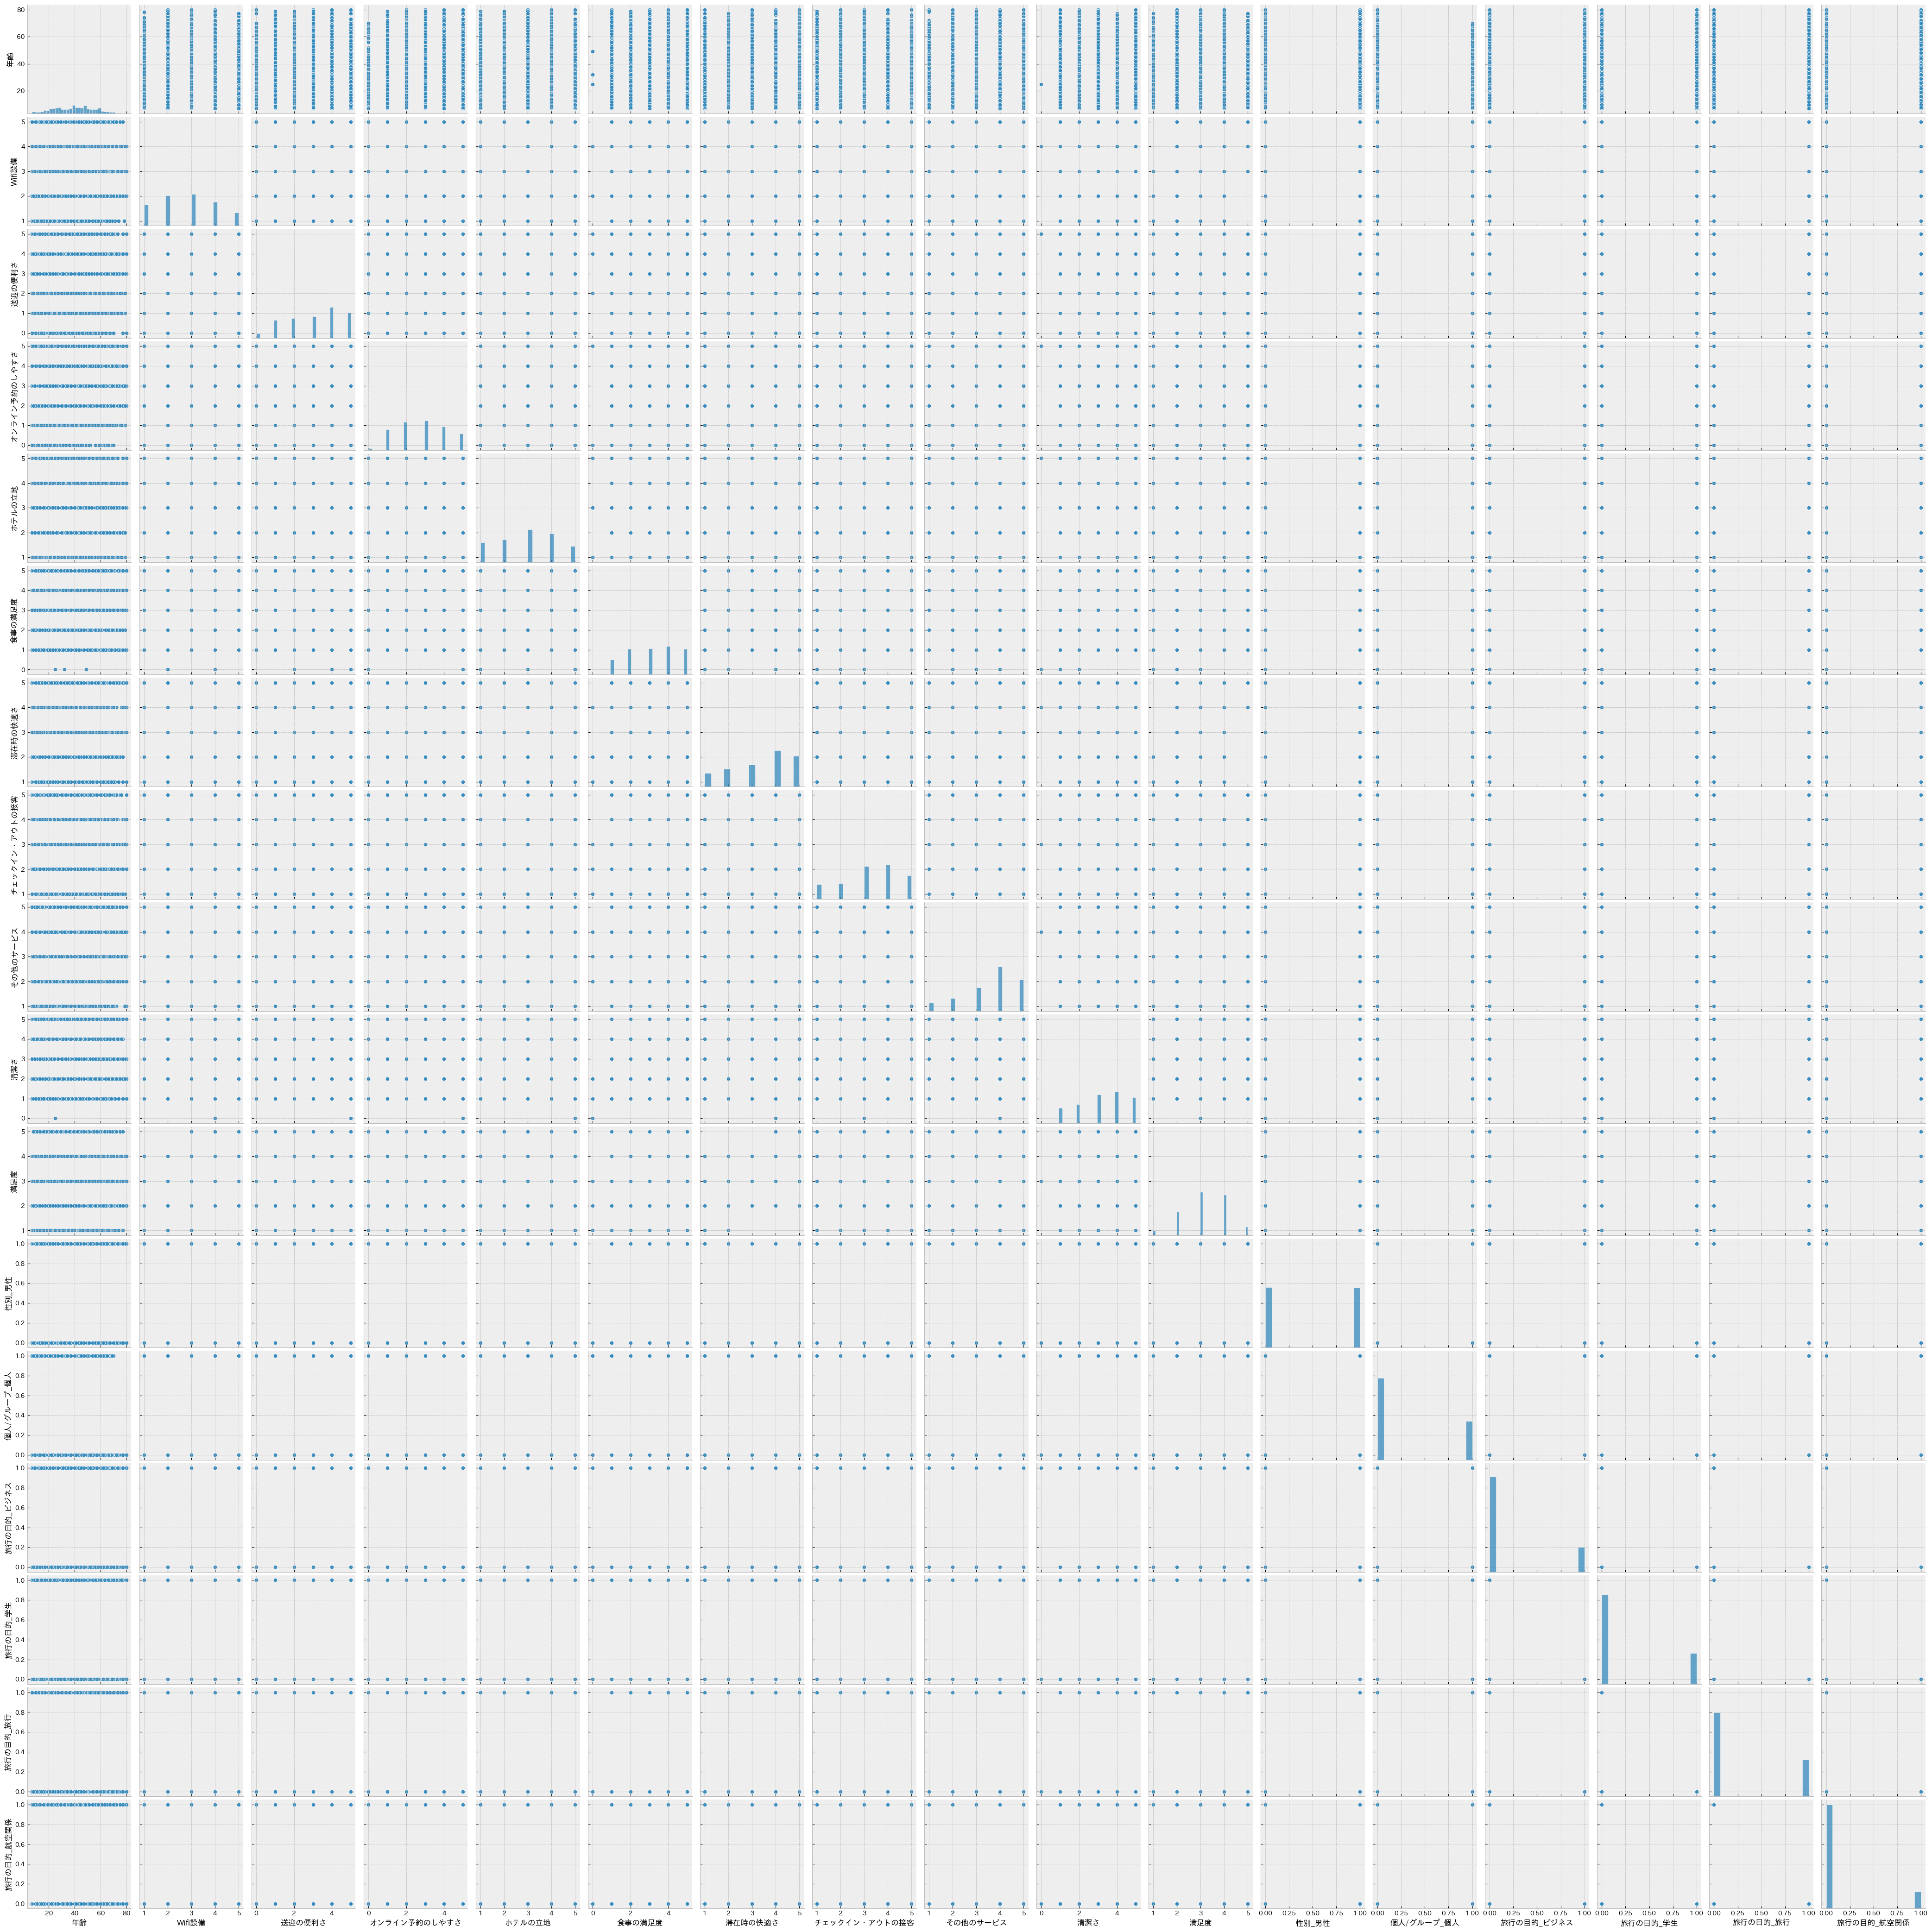

In [9]:
# 参考  
sns.pairplot(_df)

<Axes: >

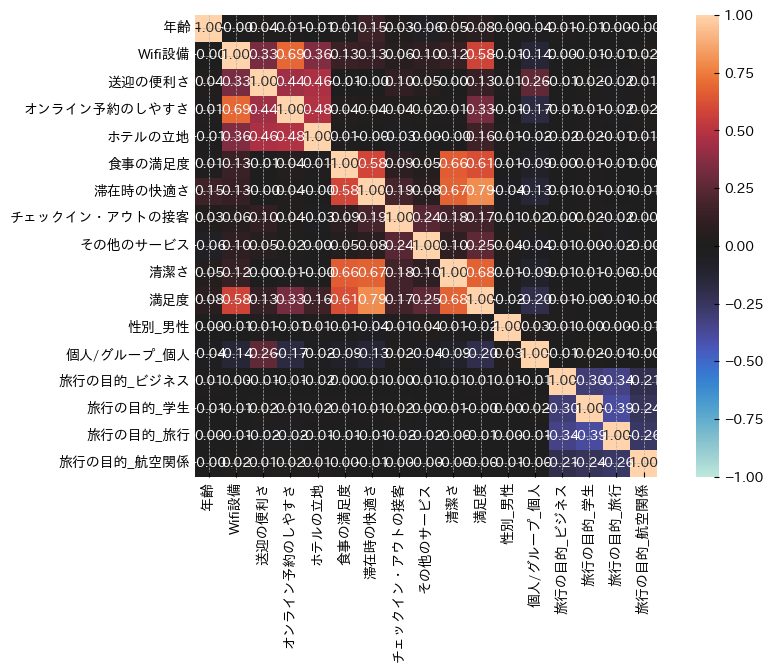

In [10]:
# 相関分析　　
sns.heatmap(_df.corr(), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f')

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [15]:
x = _df.drop('満足度', axis = 1)
y = _df['満足度']
x.head(2)

,年齢,Wifi設備,送迎の便利さ,オンライン予約のしやすさ,ホテルの立地,食事の満足度,滞在時の快適さ,チェックイン・アウトの接客,その他のサービス,清潔さ,性別_男性,個人/グループ_個人,旅行の目的_ビジネス,旅行の目的_学生,旅行の目的_旅行,旅行の目的_航空関係
0,50,4,4,4,4,3,4,4,4,4,0,0,0,1,0,0
1,35,4,5,4,4,1,1,5,4,1,0,1,1,0,0,0


In [19]:
x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled, columns=_df.drop('満足度', axis=1).columns)

In [20]:
# 分析の実行
np.random.seed(0)
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()

In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    満足度   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     6930.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:54:10   Log-Likelihood:                -1386.0
No. Observations:               10000   AIC:                             2806.
Df Residuals:                    9983   BIC:                             2929.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.2019      0.003   1151.022      0.000       3.196       3.207
年齢               -0.0036      0.003     -1.271      0.204      -0.009       0.002
Wifi設備            0.4633      0.004    117.969      0.000       0.456       0.471
送迎の便利さ           -0.0154      0.004     -4.333      0.000      -0.022      -0.008
オンライン予約のしやすさ     -0.0345      0.004     -8.011      0.000      -0.043      -0.026
ホテルの立地            0.0117      0.003      3.464      0.001       0.005       0.018
食事の満足度            0.1147      0.004     29.853      0.000       0.107       0.122
滞在時の快適さ           0.5276      0.004    132.126      0.000       0.520       0.535
チェックイン・アウトの接客    -0.0299      0.003    -10.165      0.000      -0.036      -0.024
その他のサービス          0.1433      0.003     49.432      0.000       0.138       0.149
清潔さ               0.1590      0.004     37.565      0.000       0.151       0.167
性別_男性             0.0007      0.003      0.252      0.801      -0.005       0.006
個人/グループ_個人       -0.0247      0.003     -7.986      0.000      -0.031      -0.019
旅行の目的_ビジネス        0.0008      0.004      0.188      0.851      -0.008       0.010
旅行の目的_学生         -0.0039      0.005     -0.839      0.402      -0.013       0.005
旅行の目的_旅行          0.0024      0.005      0.489      0.625      -0.007       0.012
旅行の目的_航空関係       -0.0053      0.004     -1.290      0.197      -0.013       0.003
==============================================================================
Omnibus:                     3087.589   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.976
Skew:                           0.044   Prob(JB):                    6.52e-102
Kurtosis:                       1.946   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# 自由度調整済み決定係数
result.rsquared_adj

0.917274893983254

In [23]:
# 説明変数とt,p値, 標準偏回帰係数のデータフレームを作成
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
                          index=['t', 'p', 'coef']).T
res_values

,t,p,coef
年齢,-1.270955,2.037742e-01,-0.003611
Wifi設備,117.969420,0.000000e+00,0.463290
送迎の便利さ,-4.332754,1.486964e-05,-0.015414
オンライン予約のしやすさ,-8.011477,1.260010e-15,-0.034454
ホテルの立地,3.464405,5.336381e-04,0.011694
食事の満足度,29.853107,1.196351e-187,0.114661
滞在時の快適さ,132.125668,0.000000e+00,0.527593
チェックイン・アウトの接客,-10.164707,3.735465e-24,-0.029936
その他のサービス,49.432387,0.000000e+00,0.143318
清潔さ,37.565036,5.530474e-289,0.159023


In [24]:
# 条件抽出
# t値の絶対値が2以上かつp値が5%以下
res_values[(res_values['t'].abs()>=2.0)&(res_values['p']<0.05)].sort_values('t', ascending=False)

,t,p,coef
滞在時の快適さ,132.125668,0.000000e+00,0.527593
Wifi設備,117.969420,0.000000e+00,0.463290
その他のサービス,49.432387,0.000000e+00,0.143318
清潔さ,37.565036,5.530474e-289,0.159023
食事の満足度,29.853107,1.196351e-187,0.114661
ホテルの立地,3.464405,5.336381e-04,0.011694
送迎の便利さ,-4.332754,1.486964e-05,-0.015414
個人/グループ_個人,-7.985699,1.551319e-15,-0.024688
オンライン予約のしやすさ,-8.011477,1.260010e-15,-0.034454
チェックイン・アウトの接客,-10.164707,3.735465e-24,-0.029936


In [25]:
# 相関関係と比較
tmp = df.corr()['満足度']
tmp[tmp.abs()>0.5].sort_values(ascending=False)

満足度        1.000000
滞在時の快適さ    0.793672
清潔さ        0.678053
食事の満足度     0.612857
Wifi設備     0.575273
Name: 満足度, dtype: float64